In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

figure_size = dict(
    ultra=45,
    large=35,
    middle=20,
    small=10,
    very_small=5
)

def set_plt(figsize=(10, 10)):
    params = {'axes.titlesize': figure_size['ultra'],
              'legend.fontsize': figure_size['middle'],
              'figure.figsize': figsize,
              'axes.labelsize': figure_size['ultra'],
              'xtick.labelsize': figure_size['ultra'],
              'ytick.labelsize': figure_size['ultra'],
              'figure.titlesize': figure_size['ultra'],
              'lines.linewidth': figure_size['very_small']}
    plt.rcParams.update(params)

    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)

def set_Border(axes):
    axes.spines['top'].set_color('none')
    axes.spines['right'].set_color('none')
    axes.spines['bottom'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_linewidth(figure_size['very_small'])
    axes.spines['left'].set_linewidth(figure_size['very_small'])
    axes.tick_params(axis='both', width=figure_size['very_small'], length=figure_size['small'])

COLORS = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]

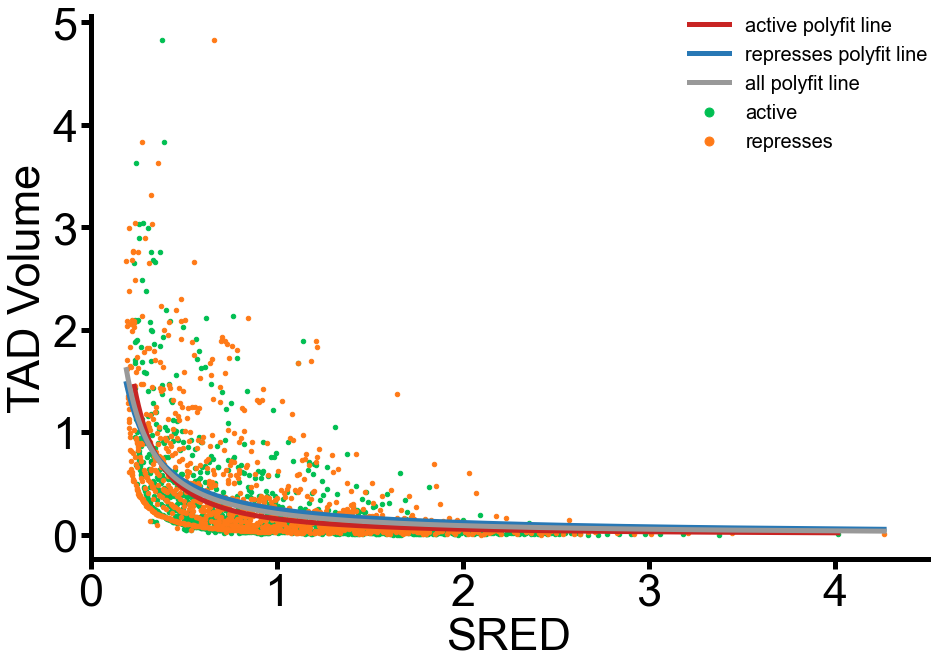

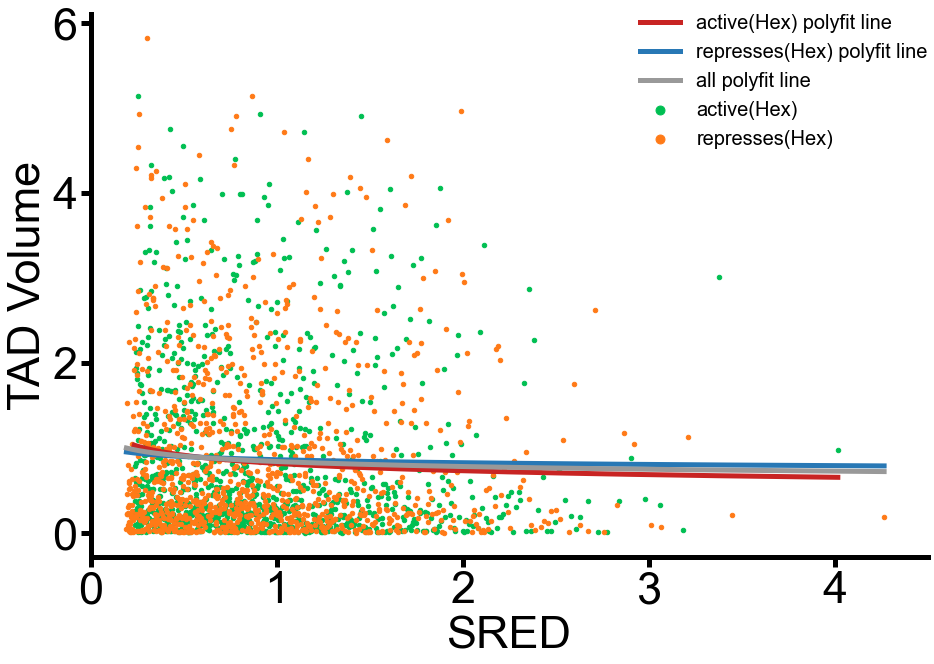

In [3]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    set_plt(figsize=(15, 10))
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
    for i, category in enumerate(categories):
        plt.scatter(
            'SRED', 'Volume', data=df.loc[df.Category==category, :], 
            s=20, color=colors[category], label=str(category)
        )
    
    def target_func(x, a, b):
        return a * (x ** b)
    data = df.loc[df.SRED>0, :].copy()
    data.sort_values('SRED', inplace=True)
    for i, category in enumerate(categories):
        _data = data.loc[data.Category==category, :]
        _color = (200/255, 36/255, 35/255) if category[:6] == 'active' else (40/255, 120/255, 181/255)
        popt, pcov = curve_fit(target_func, _data.SRED.values, _data.Volume.values, maxfev=50000000)
        calc_ydata = [target_func(i, popt[0], popt[1]) for i in _data.SRED.values]
        plt.plot(_data.SRED.values, calc_ydata, color=_color, label='{} polyfit line'.format(category))
    
    popt, pcov = curve_fit(target_func, data.SRED.values, data.Volume.values, maxfev=50000000)
    calc_ydata = [target_func(i, popt[0], popt[1]) for i in data.SRED.values]
    plt.plot(data.SRED.values, calc_ydata, color=(153/255, 153/255, 153/255), label='all polyfit line')
    
    axes.set(xlim=(0, 4.5), xlabel='SRED', ylabel='TAD Volume')
    set_Border(axes)
    plt.tick_params(colors='black', bottom=True, left=True)
    plt.legend(frameon=False, markerscale=2, borderpad=0, borderaxespad=0)
    plt.grid(False)

    plt.savefig('figure_file/{}.pdf'.format(title), format='pdf', bbox_inches='tight')
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution', _colors)

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['control_Volume'] = active_infos['Volume']
Hex_active_infos['SRED'] = active_infos['SRED']

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['control_Volume'] = represses_infos['Volume']
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(after Hex)', _colors)

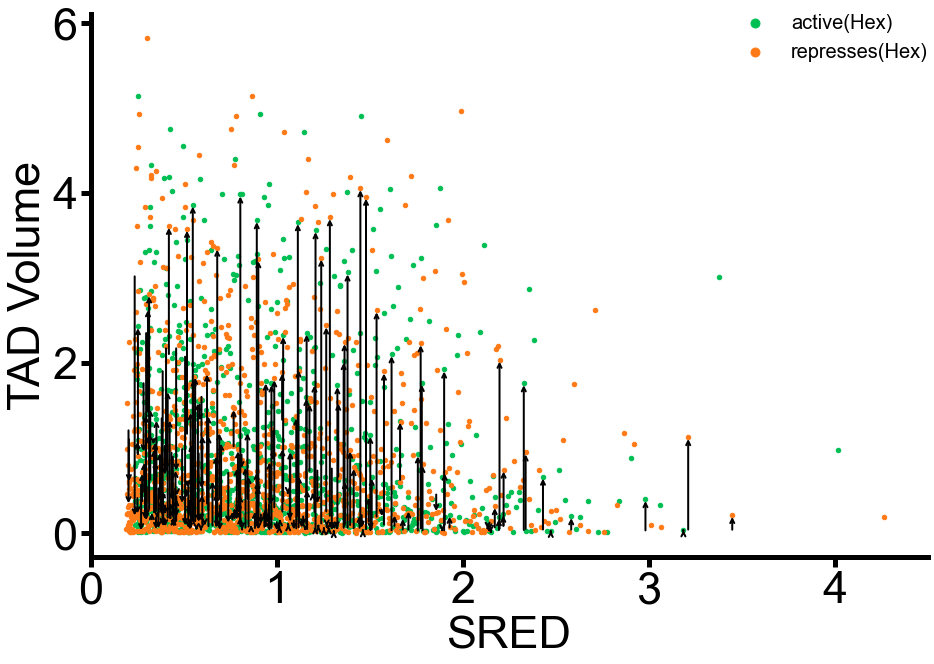

In [4]:
def show(df, title, colors):
    set_plt(figsize=(15, 10))
    
    # Prepare Data
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
    for i, category in enumerate(categories):
        plt.scatter(
            'SRED', 'Volume', data=df.loc[df.Category==category, :],
            s=20, color=colors[category], label=str(category)
        )
    
    _df = df.loc[df.SRED>0, :].copy()
    _df = _df.sample(frac=0.1)
    for index in _df.index.tolist():
        plt.annotate(
            text="", 
            xy=(float(_df.loc[index, "SRED"]), float(_df.loc[index, "Volume"])),
            xytext=(float(_df.loc[index, "SRED"]), float(_df.loc[index, "control_Volume"])),
            arrowprops={"arrowstyle":"->", "lw": 2}
        )

    axes.set(xlim=(0, 4.5), xlabel='SRED', ylabel='TAD Volume')
    set_Border(axes)
    plt.tick_params(colors='black', bottom=True, left=True)
    plt.legend(frameon=False, markerscale=2, borderpad=0, borderaxespad=0)
    plt.grid(False)
    plt.savefig('figure_file/{}.pdf'.format(title), format='pdf', bbox_inches='tight')
    plt.show()

show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0).reset_index(drop=True), 'Volume change', _colors)

No handles with labels found to put in legend.


0.563861393631908
0.573295145714328
0.574433286523869
0.575392035157866
0.576336287578704
0.577545834336929
0.580512161452138
0.581781579610927
0.582889939522094
0.586509033201086
0.587317524508211
0.59966769095557


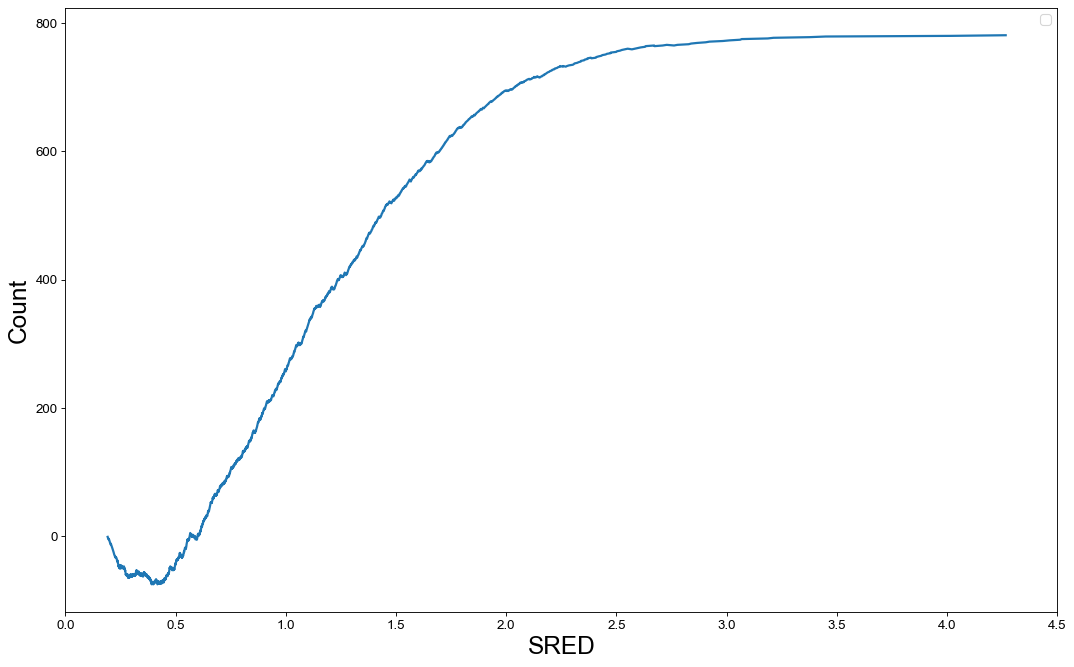

In [5]:
def show(df):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
    
    x, y = [], []
    nums = 0
    _df = df.loc[df.SRED>0, :].copy()
    _df = _df.sort_values('SRED', ascending=True)
    for index in _df.index.tolist():
        if float(_df.loc[index, "control_Volume"]) < float(_df.loc[index, "Volume"]):
            nums += 1
        else:
            nums -= 1
        if nums == 0:
            print(float(_df.loc[index, "SRED"]))
        y.append(nums)
        x.append(float(_df.loc[index, "SRED"]))
    plt.plot(x, y)
    
    plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Count')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
#     plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show()

show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0).reset_index(drop=True))

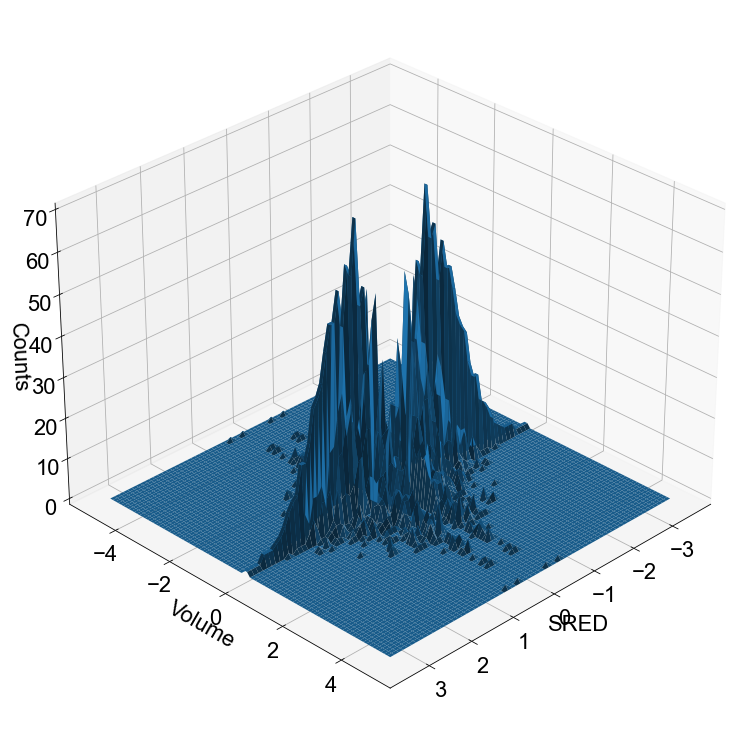

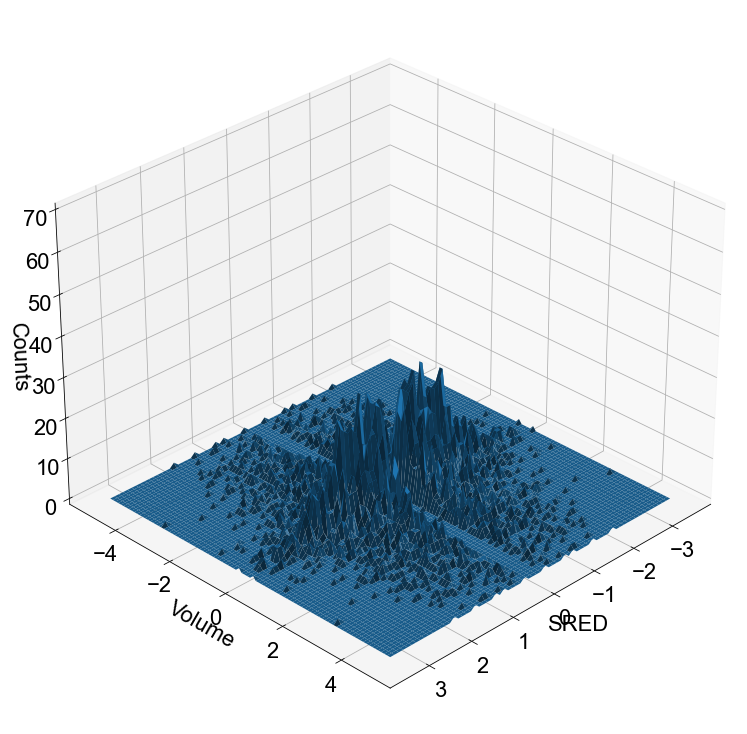

In [6]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None) 
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

xmin, xmax, xstride = -3.5, 3.5, 0.1
ymin, ymax, ystride = -5.0, 5.0, 0.1

def show(df, azim):
    fig = plt.figure(figsize=(10,10))
    ax3d = Axes3D(fig)

    x, y = np.arange(xmin,xmax,xstride), np.arange(ymin,ymax,ystride)
    # z is the count in the bin
    def f(x, y):
        z = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                z[i, j] = len(df.loc[(df['SRED']>x[i,j])&(df['SRED']<(x[i,j]+xstride))&(df['Volume']>y[i,j])&(df['Volume']<(y[i,j]+ystride))])
        return z
    x,y = np.meshgrid(x,y)
    ax3d.view_init(azim=azim, elev=30)
    ax3d.plot_surface(x,y,f(x,y),rstride=1,cstride=1)

    ax3d.set_xlabel('SRED')
    ax3d.set_ylabel('Volume')
    ax3d.set_zlabel('Counts')
    ax3d.set_zlim(0, 70)
    plt.show()

active_infos = active_infos.loc[active_infos['SRED']>0].copy()
represses_infos = represses_infos.loc[represses_infos['SRED']>0].copy()
Hex_active_infos = Hex_active_infos.loc[Hex_active_infos['SRED']>0].copy()
Hex_represses_infos = Hex_represses_infos.loc[Hex_represses_infos['SRED']>0].copy()

def get_image(df):
    df1 = df.copy()
    df1['SRED'] *= -1
    df2 = df.copy()
    df2['Volume'] *= -1
    df3 = df.copy()
    df3['SRED'] *= -1
    df3['Volume'] *= -1
    return pd.concat([df, df1, df2, df3], axis=0)

active_infos = get_image(active_infos)
represses_infos = get_image(represses_infos)
Hex_active_infos = get_image(Hex_active_infos)
Hex_represses_infos = get_image(Hex_represses_infos)

show(pd.concat([active_infos, represses_infos], axis=0), azim=45)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), azim=45)


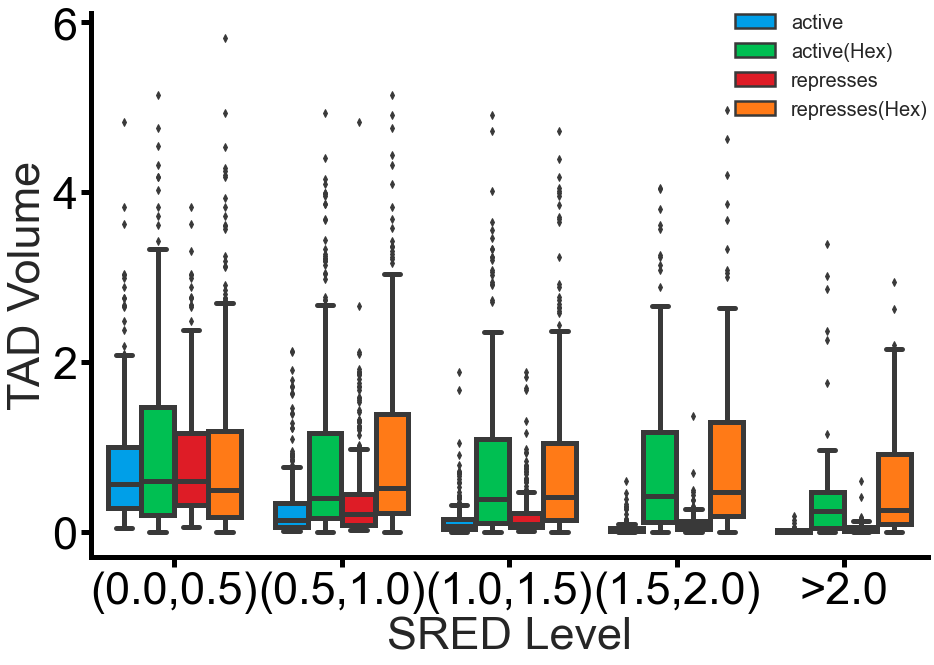

In [7]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):    
    data = df.loc[(df.SRED>0)&(df.Volume>0), :].copy()
    _05 = data.loc[data.SRED<0.5, :].copy()
    _1 = data.loc[(data['SRED']>0.5)&(data['SRED']<1)].copy()
    _15 = data.loc[(data['SRED']>1)&(data['SRED']<1.5)].copy()
    _2 = data.loc[(data['SRED']>1.5)&(data['SRED']<2)].copy()
    _max = data.loc[data['SRED']>2].copy()

    _05['Category'] = '(0.0,0.5)'
    _1['Category'] = '(0.5,1.0)'
    _15['Category'] = '(1.0,1.5)'
    _2['Category'] = '(1.5,2.0)'
    _max['Category'] = '>2.0'
    data = pd.concat([_05, _1, _15, _2, _max], axis=0)
    
    set_plt(figsize=(15, 10))
    sns.set_theme(style="whitegrid")
    sns.boxplot(
        x='Category', y='Volume', data=data, hue='Experiment', 
        palette=colors, saturation=1, linewidth=figure_size['very_small']
    )
    
    sns.despine()
    set_Border(plt.gca())
    plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
    plt.legend(frameon=False, markerscale=2, borderpad=0, borderaxespad=0, fontsize=figure_size['middle'])
    plt.grid(False)
    plt.xlabel("SRED Level", fontsize=figure_size['ultra'])
    plt.ylabel("TAD Volume", fontsize=figure_size['ultra'])

    plt.savefig('figure_file/{}.pdf'.format(title), format='pdf', bbox_inches='tight')
    plt.show()

_colors = {
    'active': COLORS[0],
    'represses': COLORS[1],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]
active_infos['Experiment'] = 'active'

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']
Hex_active_infos['Experiment'] = 'active(Hex)'

represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]
represses_infos['Experiment'] = 'represses'

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']
Hex_represses_infos['Experiment'] = 'represses(Hex)'

show(pd.concat([active_infos, Hex_active_infos, represses_infos, Hex_represses_infos], axis=0), 'Volume distribution under different segments of SRED', _colors)


In [8]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def get_factor_nums(chip_seq_path, infos):
    infos['Factor_Peak_NUMS'] = 0
    with open(chip_seq_path)as f:
        for line in f:
            datas = line.strip().split()
            left, right = int(datas[1]), int(datas[2])
            infos.loc[infos[0]==datas[0]].loc[infos[1] < left].loc[infos[2] > right].index
            for index in infos.loc[infos[0]==datas[0]].loc[infos[1] < left].loc[infos[2] > right].index.tolist():
                infos.loc[index, "Factor_Peak_NUMS"] = infos.loc[index, "Factor_Peak_NUMS"] + 1
    return infos

active_infos = get_factor_nums('/data1/lmh_data/MINE/source/HeLa/POLR2A_peaks.bed', active_infos)
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]
active_infos['Factor_Peak_NUMS/Volume'] = active_infos['Factor_Peak_NUMS'] / active_infos['Volume']

represses_infos = get_factor_nums('/data1/lmh_data/MINE/source/HeLa/EZH2_peaks.bed', represses_infos)
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]
represses_infos['Factor_Peak_NUMS/Volume'] = represses_infos['Factor_Peak_NUMS'] / represses_infos['Volume']

active SRED mean: 0.9466682215215753
active Factor_Peak_NUMS/Volume mean: 243.2749983505422
represses SRED mean: 0.9257094872903804
represses Factor_Peak_NUMS/Volume mean: 14.850024454594527


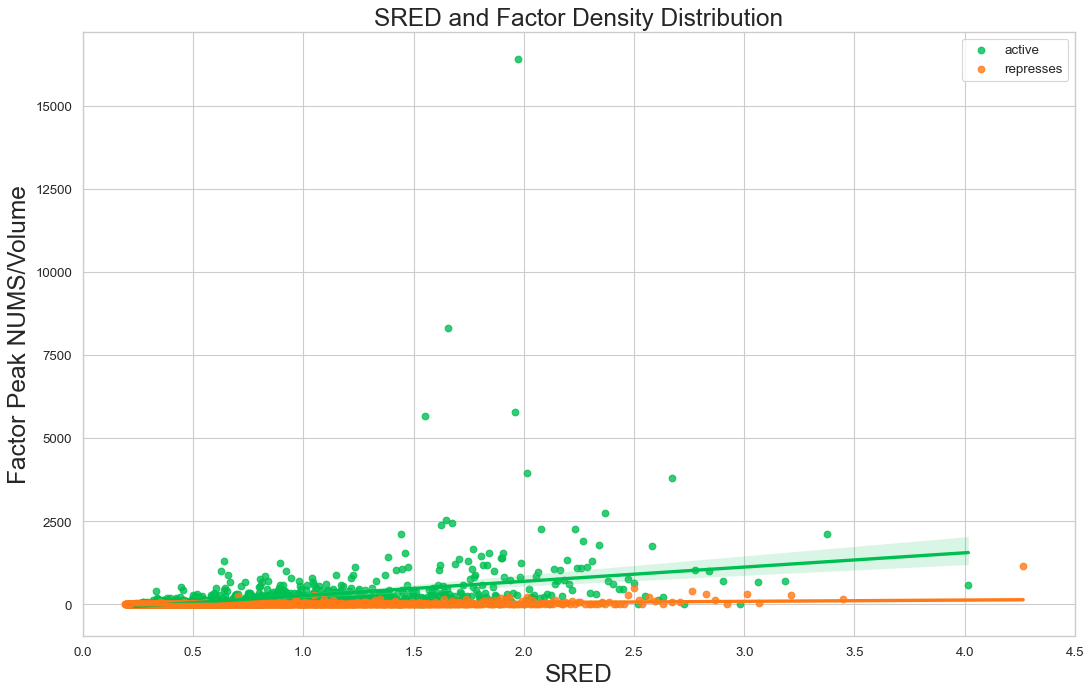

In [9]:
def histogram(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        data = df.loc[df.Category==category, :]
        data = data.loc[data.SRED>0, :]
        print('{} SRED mean: {}'.format(category, data['SRED'].mean()))
        print('{} Factor_Peak_NUMS/Volume mean: {}'.format(category, data['Factor_Peak_NUMS/Volume'].mean()))
        sns.regplot(x='SRED', y='Factor_Peak_NUMS/Volume', data=data, color=colors[category], label=str(category))
        
    # Decorations
    plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Factor Peak NUMS/Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.show()

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
}

histogram(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Factor Density Distribution', _colors)
